In [650]:
import tensorflow as tf
import keras
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error as skmse
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import pandas as pd

In [651]:
# Scaling function #
def Scaling(x,choice):
    if choice==1:
        scaler=MinMaxScaler()
    elif choice==2:
        scaler=StandardScaler()
    elif choice==3:
        scaler=RobustScaler()
    else:
        return (print('bad input!!'))
    mod=scaler.fit(x)
    x=mod.transform(x)
    return x

In [652]:
x=np.arange(0,5,0.05)    #input parameter
minx=min(x)
denx=(max(x)-minx)
#print(x)
x=x.reshape(-1,1)

In [653]:
# y=10*(x**3)-4/(x**2)+50    #output parameter
amp=100
f=1
phi=0
y=(amp*np.sin(2*np.pi*f*x+phi))*(np.exp(-0.5*x))
miny=min(y)
den=max(y)-miny

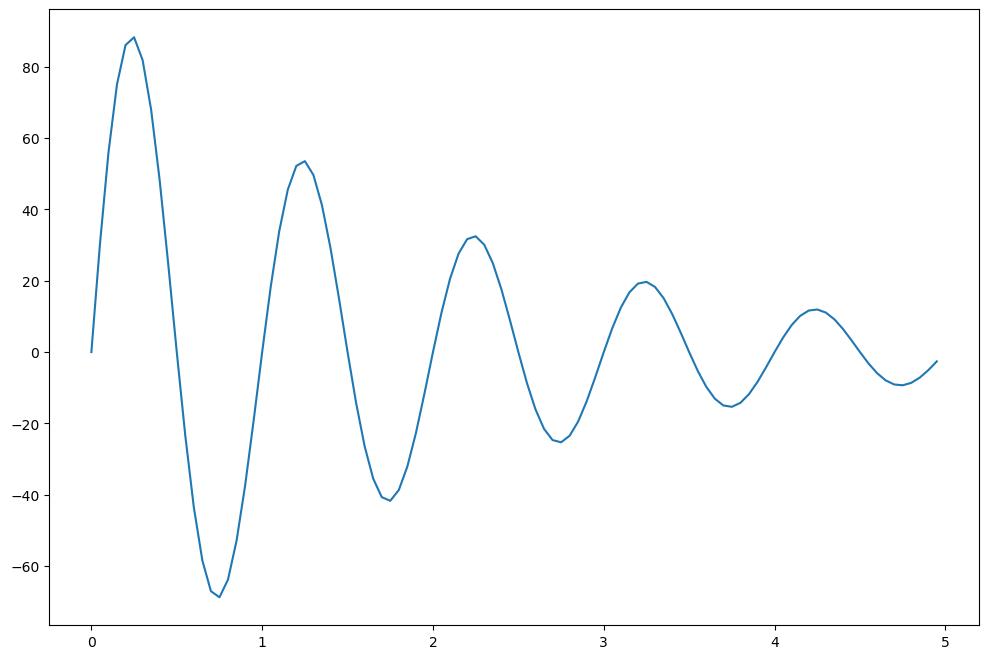

In [654]:
plt.plot(x,y)
plt.show()

In [655]:
# feature scaling of both the input and the output parameters
x=Scaling(x,1)
y=Scaling(y,1)

In [656]:
#Train/test dataset split
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.2, shuffle=True, random_state=42)

In [657]:
# ANN Layer description
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.LecunNormal()),    
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.LecunNormal()),    
    tf.keras.layers.Dense(32, activation='relu', kernel_initializer=tf.keras.initializers.LecunNormal()),
    tf.keras.layers.Dense(1)
])

In [658]:
model.compile(optimizer='adam', loss='mse')

In [659]:
model.fit(xtrain, ytrain, epochs=10000, batch_size=80, verbose=0)

In [660]:
# Predict
ypred = model.predict(xtest)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


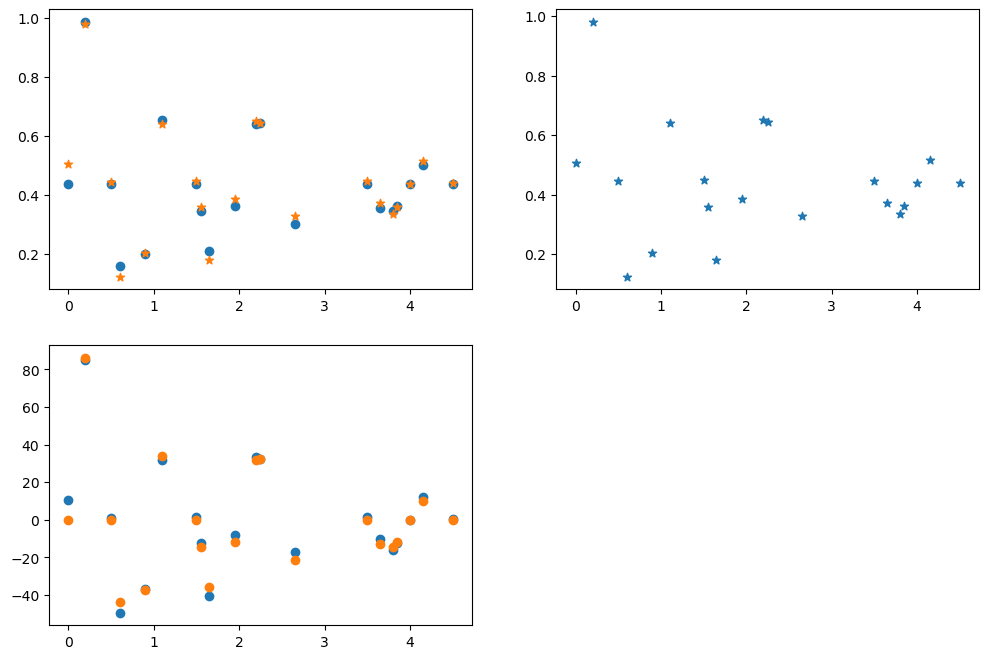

In [661]:
plt.rcParams["figure.figsize"] = (12, 8)
plt.subplot(2,2,1) # x vs ytest and ypredicted in scaled format
plt.scatter(xtest*denx+minx,ytest)
plt.scatter(xtest*denx+minx,ypred, marker='*')
plt.subplot(2,2,2) # x vs ypredicted in scaled format
plt.scatter(xtest*denx+minx,ypred, marker='*')
plt.subplot(2,2,3)# x vs ytest and ypredicted in de-scaled/original format
plt.scatter(xtest*denx+minx,ypred*den+miny)
plt.scatter(xtest*denx+minx,ytest*den+miny) #recovered (de-scaling the output data)
plt.show()

In [662]:
eval=np.hstack([xtest*denx+minx, ytest, ypred, ytest*den+miny, ypred*den+miny])
#eval=eval.reshape(3,20)
print(eval.shape)

Eval=pd.DataFrame(eval, columns=['X Test_Original', 'Y Test_scaled', 'Y Predicted_scaled', 'Y Test_Original', 'Y Predicted_Original'])
print(Eval)

(20, 5)
    X Test_Original  Y Test_scaled  Y Predicted_scaled  Y Test_Original  \
0              4.15       0.502531            0.515743     1.015773e+01   
1              2.65       0.300837            0.328237    -2.150391e+01   
2              3.50       0.437823            0.446075     1.421085e-14   
3              2.25       0.644637            0.643751     3.246525e+01   
4              2.20       0.639494            0.650520     3.165792e+01   
5              1.95       0.363572            0.384906    -1.165588e+01   
6              1.10       0.653855            0.640506     3.391226e+01   
7              4.00       0.437823            0.437958    -1.421085e-14   
8              0.50       0.437823            0.444498     1.421085e-14   
9              0.00       0.437823            0.506006     0.000000e+00   
10             0.90       0.199072            0.203034    -3.747884e+01   
11             1.50       0.437823            0.447377     1.421085e-14   
12             3.

In [663]:
re = r2_score(ytest*den+miny, ypred*den+miny)
print("R2 Squared Error:", re)

R2 Squared Error: 0.9858787114699732
